# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [265]:
m=1
p = 0.01#0.4
q = 1#1.0#0.1#0.1#0.01#0.9#0.01#0.5 #Pure SF is q=0
run = 1

1

Choose your grid

In [266]:
global compactified=true
global loggrid=false
global bisection=false
global zeroformat=false
global twod=true

global source=false

false

In [267]:
function compactify(r)
    x=r/(1+r)
    return x
end

compactify (generic function with 1 method)

In [268]:
using Quadmath, Printf

res=m;
N=2.0^m*400.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=2.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [269]:
print(N)

400.0

In [270]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA"

# Grid

In [271]:
using Printf
include("./TMYangMillsTHREE.jl");

In [272]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.0025
the time step is 0.00125


# Initial data of m β Ψ and Ψ,x

In [379]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initxi=zeros(L)
initderxi=zeros(L)

state_array=[initm initbeta initxi initderxi];

#WBAR,R
#0.088125<A*<0.08875
A=0.0884375
r0=0.3
sigma=0.1

initderxi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,4] = initderxi
state_array=ghost(state_array)

####
#XI FROM XI,X

derxi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

funcs=[derxi_func];

In [380]:
(0.088125+0.08875)/2
there were runs with 0.6 as critical stop that were marked as critical but didnt crash

0.0884375

In [381]:
y0=[0.0 0.0 0.0]

if twod==true
        state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
    else
        state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);
end

#state_array = ghost(state_array);

401×3 Matrix{Float64}:
 0.0          0.0          0.0
 7.09232e-12  1.33672e-9   3.19434e-8
 2.7252e-11   3.82293e-9   7.43352e-8
 5.80252e-11  6.25204e-9   1.29674e-7
 1.04493e-10  9.09634e-9   2.00973e-7
 1.74199e-10  1.26619e-8   2.91853e-7
 2.78191e-10  1.7284e-8    4.06654e-7
 4.32526e-10  2.33867e-8   5.50564e-7
 6.60411e-10  3.15299e-8   7.29768e-7
 9.95206e-10  4.2463e-8    9.51622e-7
 1.48463e-9   5.71925e-8   1.22485e-6
 2.1966e-9    7.70706e-8   1.55979e-6
 3.22734e-9   1.03912e-7   1.96864e-6
 ⋮                        
 0.105092     0.411855    -6.92996e-10
 0.105092     0.411855    -6.92996e-10
 0.105092     0.411855    -6.92996e-10
 0.105092     0.411855    -6.92996e-10
 0.105092     0.411855    -6.92996e-10
 0.105092     0.411855    -6.92996e-10
 0.105092     0.411855    -6.92996e-10
 0.105092     0.411855    -6.92996e-10
 0.105092     0.411855    -6.92996e-10
 0.105092     0.411855    -6.92996e-10
 0.105092     0.411855    -6.92996e-10
 0.105092     0.411855    -6.92996

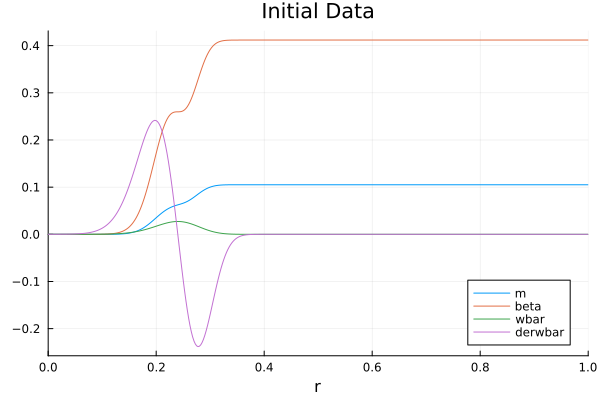

In [382]:
using Plots #showing initial data and the initial status of the horizon finder
plot((initX[4:L-3]), state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "wbar" "derwbar"],xlim=[0,1])

In [383]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [384]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "xi", "derxi", "derderxi"]

derderxi=Der_arrayLOP(state_array,4,initX) .* (initX .- 1) .^ 2
print_muninn(files, 0, [state_array[:,1:4] derderxi],res,"w", initX)

In [385]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [386]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

1.2442537275112058


In [387]:
using Base.Threads
Threads.nthreads()

4

In [388]:
monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ initX[5:L-4] .* (1 .- initX[5:L-4]);
maximum(monitor_ratio)

0.46741572458797315

In [389]:
dt=0.002/2^(m-1)

0.002

 ## Time evolution

fixed grid

In [390]:
finaltime=1.5
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 50 dt is 0.0005025094063480207, t=0.025125470320193112 speed is 0.4975031249999301, dx/dt=4.975031249999301


iteration 100 dt is 0.000502509406348555, t=0.05025094063760549 speed is 0.4975031249994011, dx/dt=4.975031249994011


iteration 150 dt is 0.0005025094063502843, t=0.07537641095506924 speed is 0.4975031249976891, dx/dt=4.97503124997689


iteration 200 dt is 0.0005025094063556987, t=0.10050188127269719 speed is 0.49750312499232857, dx/dt=4.975031249923286


iteration 250 dt is 0.0005025094063711169, t=0.12562735159081195 speed is 0.49750312497706395, dx/dt=4.975031249770639


iteration 300 dt is 0.0005025094064107415, t=0.1507528219102323 speed is 0.4975031249378342, dx/dt=4.9750312493783415


iteration 350 dt is 0.0005025094065022497, t=0.1758782922328062 speed is 0.4975031248472377, dx/dt=4.975031248472376


iteration 400 dt is 0.0005025094066912232, t=0.20100376256221297 speed is 0.4975031246601468, dx/dt=4.975031246601468


iteration 450 dt is 0.00050250940703819